In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import plotly.express as px

from src.models.qsar_OLS_pca import *
from src.utils.plotting_pred_utils import *

import warnings
from rdkit import RDLogger

# Suppress Pandas warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Suppress RDKit warnings
RDLogger.DisableLog("rdApp.*")

In [13]:
fam0 = ['CDK5', 'CDK1-G2/M-Cyc1', 'CDK1', 'CDK1-G2/M-CycB', 'CDK2', 'CDK2-CycA2[171-432]', 'CDK2-G1/S-CycE1', 'CDK2-CycA2', 'CDK2-CycA2[177-432]', 'CDK2-G1/S-CycE1-GSTP', 'CDK2-CycA1', 'CDK3']
fam1 = ['CDK3-G1/S-CycE1', 'CDK6-G1/S-CycD1[L188C]', 'CDK7-CycH', 'CDK5-Act1[99-307]', 'CDK5-Act1']
fam2 = ['CDK7', 'CDK9', 'CDK4-G1/S-CycD1', 'CDK4-G1/S-CycD1[L188C]', 'CDK4', 'CDK6-G1/S-CycD3', 'CDK6']
fam3 = ["CDK9-CycT1"]
families = [fam0, fam1, fam2, fam3]

In [14]:

df_fam = pd.read_csv("src/data/CDK_cleaned_for_families_prediction.csv")

Family: ['CDK5', 'CDK1-G2/M-Cyc1', 'CDK1', 'CDK1-G2/M-CycB', 'CDK2', 'CDK2-CycA2[171-432]', 'CDK2-G1/S-CycE1', 'CDK2-CycA2', 'CDK2-CycA2[177-432]', 'CDK2-G1/S-CycE1-GSTP', 'CDK2-CycA1', 'CDK3']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.7787872547014845
R2 of the shuffled model:  0.1348602929534155
RMSE of the original model:  1.2577898244848238
RMSE of the shuffled model:  2.4874028454635217


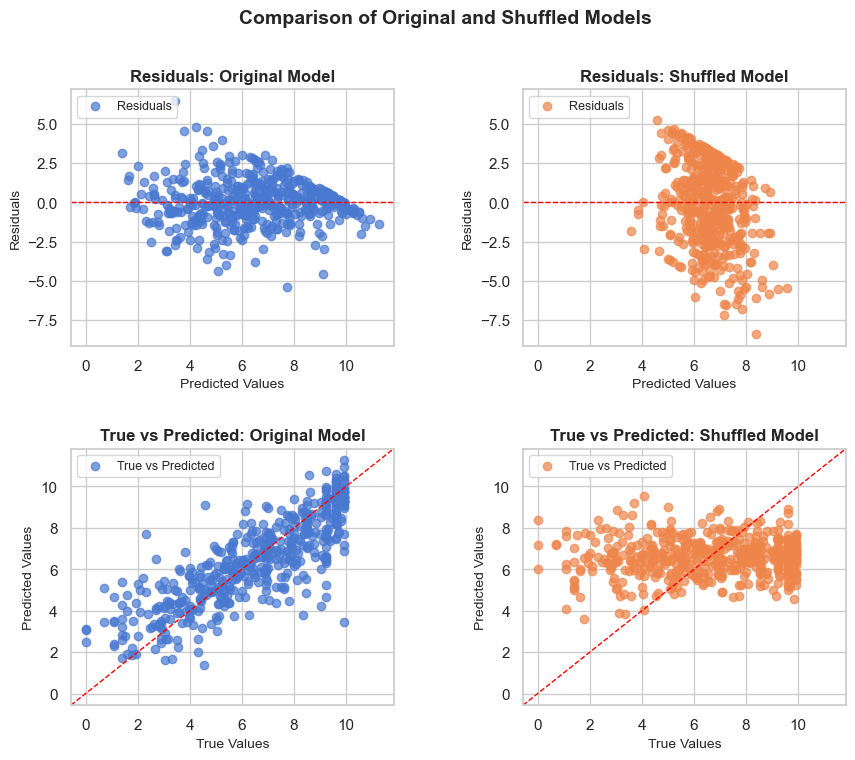

Family: ['CDK3-G1/S-CycE1', 'CDK6-G1/S-CycD1[L188C]', 'CDK7-CycH', 'CDK5-Act1[99-307]', 'CDK5-Act1']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.6357298471145016
R2 of the shuffled model:  0.3755774982944282
RMSE of the original model:  1.483867162760895
RMSE of the shuffled model:  1.9427749839599986


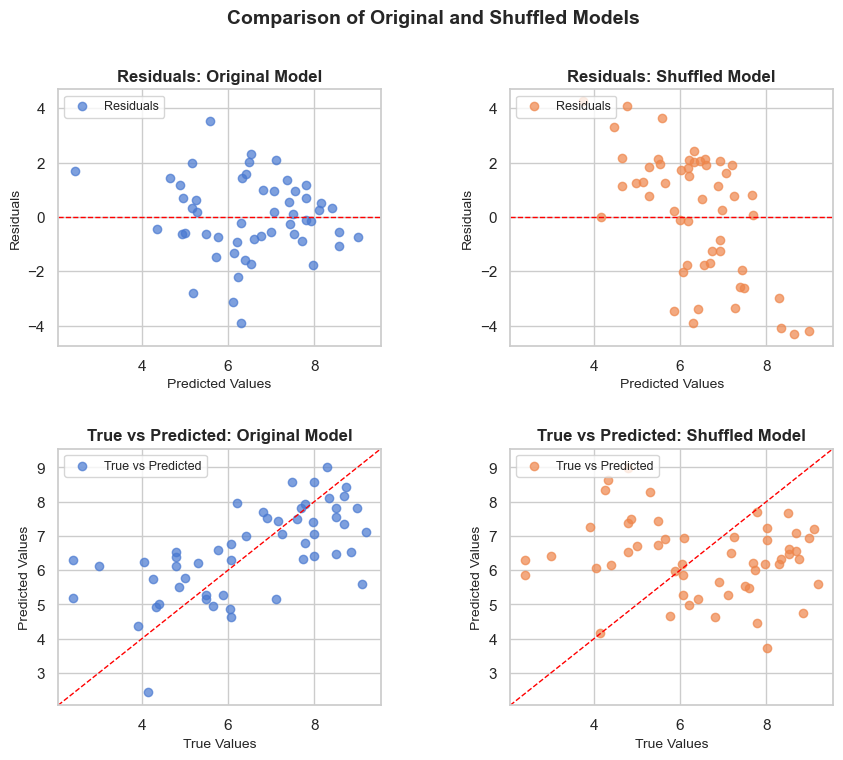

Family: ['CDK7', 'CDK9', 'CDK4-G1/S-CycD1', 'CDK4-G1/S-CycD1[L188C]', 'CDK4', 'CDK6-G1/S-CycD3', 'CDK6']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.6786158216823134
R2 of the shuffled model:  0.13642169274559135
RMSE of the original model:  1.3607033254630445
RMSE of the shuffled model:  2.2304991499223843


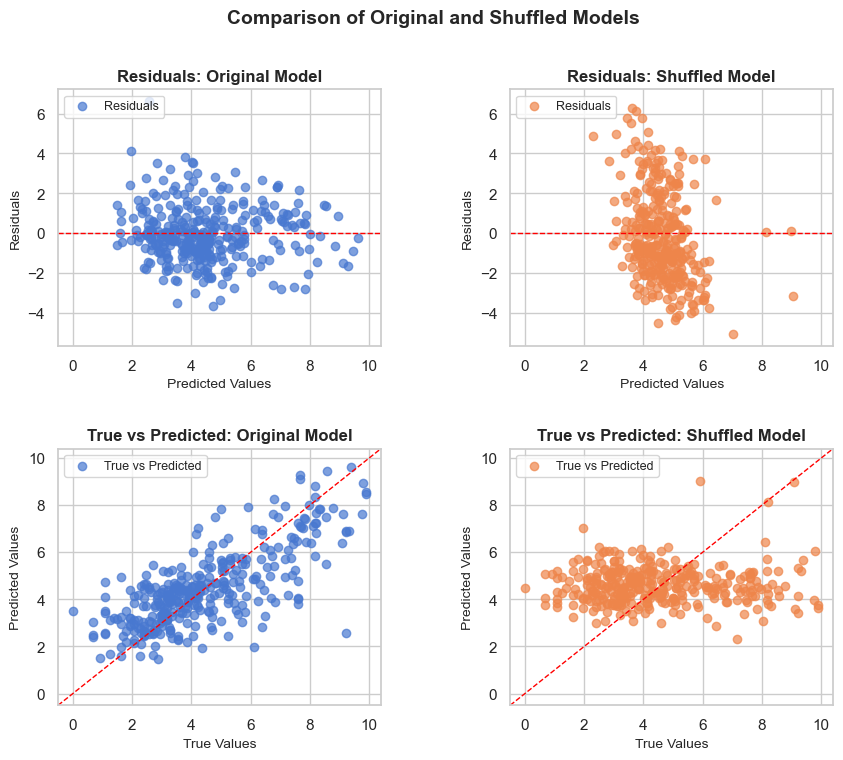

Family: ['CDK9-CycT1']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.6371658090441215
R2 of the shuffled model:  0.2268623997095549
RMSE of the original model:  1.0293514157898966
RMSE of the shuffled model:  1.5025812358581612


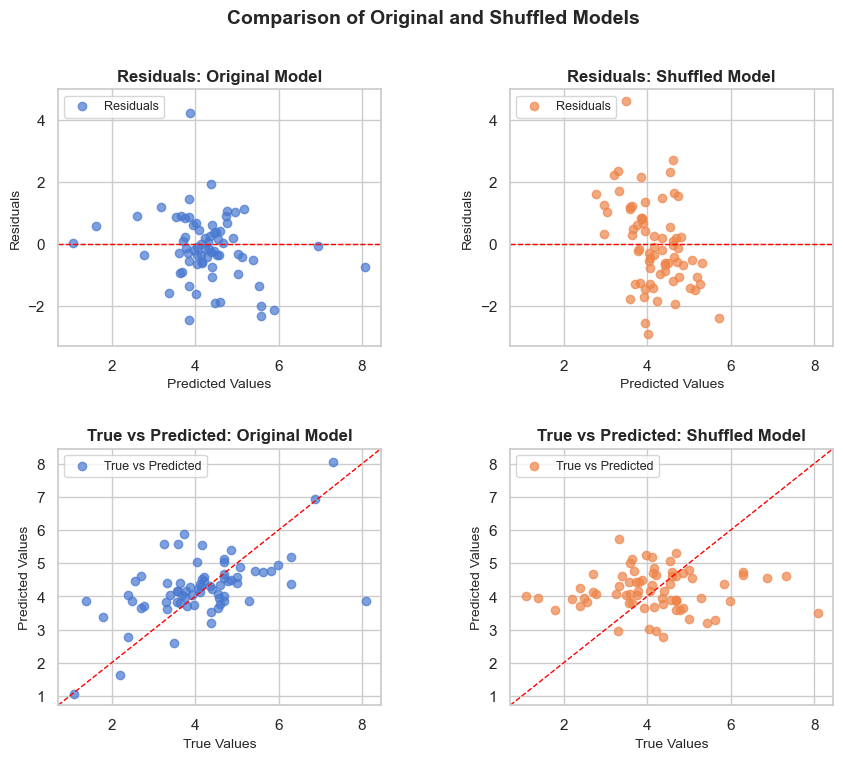

In [15]:

for fam in families:
    print(f"Family: {fam}")
    model, X_train, X_test, y_train, y_test, scaler, pca = create_model(df_fam, fam, random_state=42)
    compare_cdkmodel_and_shuffled(model, y_train=y_train, X_train=X_train, y_test=y_test, X_test=X_test)